Plotting Some Example Graphs

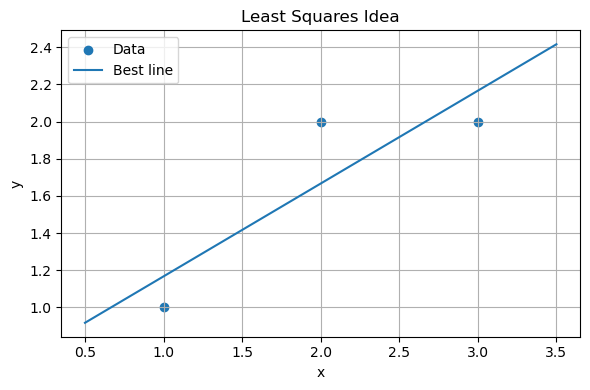

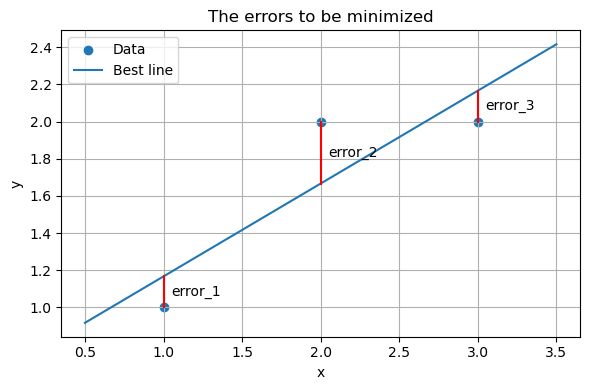

In [73]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3])
y = np.array([1, 2, 2])

m, b = np.polyfit(x, y, 1)

x_line = np.linspace(x.min() - 0.5, x.max() + 0.5, 100)
y_line = m * x_line + b

plt.figure(figsize=(6, 4))
plt.scatter(x, y, label='Data')
plt.plot(x_line, y_line, label=f'Best line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Squares Idea')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


x = np.array([1, 2, 3])
y = np.array([1, 2, 2])

m, b = np.polyfit(x, y, 1)

y_pred = m * x + b
residuals = y - y_pred

x_line = np.linspace(x.min() - 0.5, x.max() + 0.5, 100)
y_line = m * x_line + b

plt.figure(figsize=(6, 4))
plt.scatter(x, y, label='Data')
plt.plot(x_line, y_line, label='Best line')

for xi, yi, ypi, err in zip(x, y, y_pred, residuals):
    plt.plot([xi, xi], [ypi, yi], color='red')
    mid_y = (yi + ypi) / 2
    plt.text(xi + 0.05, mid_y, f'error_{xi}', va='center')

plt.xlabel('x')
plt.ylabel('y')
plt.title('The errors to be minimized')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Plotting the Condition Number of Problem 1 b)

/tmp/ipykernel_19751/595996493.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  [(m + 1) / 2,  (m + 1)**2 / (3 * m)]


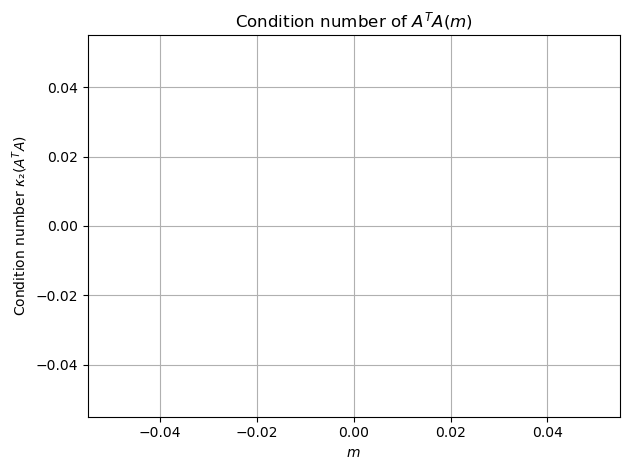

In [74]:
import numpy as np
import matplotlib.pyplot as plt

def cond_number(m):

    """
    This function computes the condition number of the matrix A(m) in the 2-norm. The matrix A is defined.

    Args:
        m (float): parameter for the matrix A(m)
    Returns:
        float: condition number of A(m)
    Raises:
        ZeroDivisionError: if m = 0
        np.linalg.LinAlgError: if A(m) is not invertible
    """

    A = np.array([
        [m + 1,          (m + 1) / 2],
        [(m + 1) / 2,  (m + 1)**2 / (3 * m)]
    ])
    A_inv = np.linalg.inv(A)
    return np.linalg.norm(A, 2) * np.linalg.norm(A_inv, 2)

 
M = float(input("Enter maximum m (M > 0): "))
N = int(input("Enter number of sample points: ")) #however the user wants to plot 

m_vals = np.linspace(0, M, N)
conds  = []

for m in m_vals:
    try:
        conds.append(cond_number(m))
    except (ZeroDivisionError, np.linalg.LinAlgError):
        conds.append(np.inf) #if it is not invertible

plt.figure()
plt.plot(m_vals, conds)
plt.xlabel('$m$')
plt.ylabel('Condition number $κ₂(A^T A)$')
plt.title('Condition number of $A^T A(m)$')
plt.grid(True)
plt.tight_layout()
plt.show()


poly_ls(m,n) -> problem 1 c)

In [75]:
import numpy as np

def poly_ls(m, n):

    """
    Builds the (n+1) x (n+1) matrix A^T A for least-squares polynomial fitting.
    
    Args:
        m (int): number of subintervals (m >= 0)
        n (int): polynomial degree (n >= 0)
    Returns:
        np.ndarray: shape (n+1, n+1) Gram matrix
    Raises:
        ValueError: if m or n is negative or not integer
    """

    if not isinstance(m, int) or not isinstance(n, int):
        raise ValueError("m and n must be integers")
    if m < 0 or n < 0:
        raise ValueError("m and n must be non-negative")

    x = np.linspace(0, 1, m+1) #sample space

    A = np.zeros((n+1, n+1), dtype=float) #intializes 0 matrix to be filled
    np.set_printoptions(precision=3, suppress=True)
    for j in range(n+1): #THIS IS NOT A, IT IS A^* A
        for k in range(n+1):
            A[j, k] = np.sum(x**(j + k)) #fills each entry

    return A

for m, n in [(1, 1), (2, 2), (2, 3)]: #trivial examples
    M = poly_ls(m, n)
    print(f"m = {m}, n = {n}:")
    print(M, end="\n\n")


m = 1, n = 1:
[[2. 1.]
 [1. 1.]]

m = 2, n = 2:
[[3.    1.5   1.25 ]
 [1.5   1.25  1.125]
 [1.25  1.125 1.062]]

m = 2, n = 3:
[[3.    1.5   1.25  1.125]
 [1.5   1.25  1.125 1.062]
 [1.25  1.125 1.062 1.031]
 [1.125 1.062 1.031 1.016]]



Condition Variance With Perturbations (1e)

Condition numbers of $hat(A^* A)$ (m=100) for degree n:
  n =  1 → $kappa_2(A^* A)$ = 1.891 * 10^1
  n =  2 → $kappa_2(A^* A)$ = 5.047 * 10^2
  n =  3 → $kappa_2(A^* A)$ = 1.467 * 10^4
  n =  4 → $kappa_2(A^* A)$ = 4.428 * 10^5
  n =  5 → $kappa_2(A^* A)$ = 1.366 * 10^7
  n =  6 → $kappa_2(A^* A)$ = 4.274 * 10^8
  n =  7 → $kappa_2(A^* A)$ = 1.352 * 10^10
  n =  8 → $kappa_2(A^* A)$ = 4.312 * 10^11
  n =  9 → $kappa_2(A^* A)$ = 1.386 * 10^13
  n = 10 → $kappa_2(A^* A)$ = 4.483 * 10^14
  n = 11 → $kappa_2(A^* A)$ = 1.594 * 10^16
  n = 12 → $kappa_2(A^* A)$ = 1.841 * 10^18
  n = 13 → $kappa_2(A^* A)$ = 4.871 * 10^17
  n = 14 → $kappa_2(A^* A)$ = 1.144 * 10^18
  n = 15 → $kappa_2(A^* A)$ = 4.695 * 10^17
  n = 16 → $kappa_2(A^* A)$ = 3.664 * 10^17
  n = 17 → $kappa_2(A^* A)$ = 3.683 * 10^17
  n = 18 → $kappa_2(A^* A)$ = 1.165 * 10^18
  n = 19 → $kappa_2(A^* A)$ = 7.725 * 10^17
  n = 20 → $kappa_2(A^* A)$ = 2.029 * 10^18


<>:54: SyntaxWarning: invalid escape sequence '\k'
<>:54: SyntaxWarning: invalid escape sequence '\k'
/tmp/ipykernel_19751/4195538077.py:54: SyntaxWarning: invalid escape sequence '\k'
  plt.ylabel("Condition number $\kappa(A^* A))$")


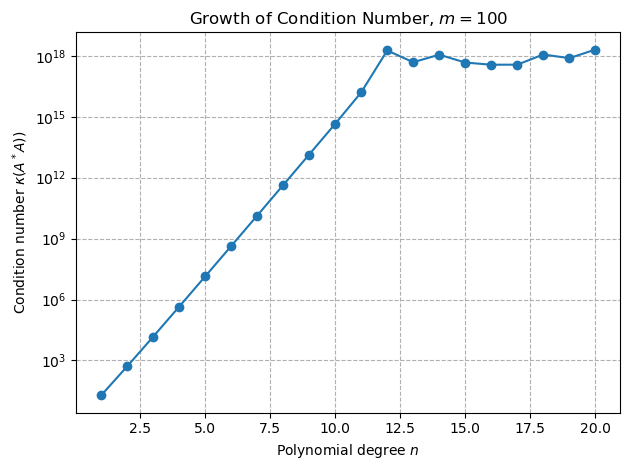

In [76]:
import numpy as np
import matplotlib.pyplot as plt

def format_scientific(x, sig=3):

    """
    Formats a number in scientific notation with a specified number of significant digits.

    Args:
        x (float): number to format
        sig (int): number of significant digits (default: 3)
    Returns:
        str: formatted string in scientific notation
    """

    if x == 0:
        return "0"
    exp = int(np.floor(np.log10(abs(x))))
    mant = x / 10**exp
    return f"{mant:.{sig}f} * 10^{exp}"

def compute_condition_numbers(m, max_n):

    """
    Returns a list of the condition numbers of the polynomial least-squares matrix $hat(A)(m)$ for degrees n = 1 to max_n.

    Args:
        m (int): number of subintervals (m >= 0)
        max_n (int): maximum polynomial degree (max_n >= 0)
    Returns:
        list: condition numbers of $hat(A)(m)$ for degrees n = 1 to max_n
    """

    conds = []
    for n in range(1, max_n + 1):
        A = poly_ls(m, n) 
        sv = np.linalg.svd(A, compute_uv=False) #computes singular values
        conds.append(sv[0] / sv[-1]) #condition number is the ratio of the largest to smallest singular value.
    return conds

m = 100
max_n = 20

cond_nums = compute_condition_numbers(m, max_n)
n_values = np.arange(1, max_n + 1)

print(f"Condition numbers of $hat(A^* A)$ (m={m}) for degree n:")
for n, c in zip(n_values, cond_nums):
    print(f"  n = {n:2d} → $kappa_2(A^* A)$ = {format_scientific(c)}")

plt.figure()
plt.semilogy(n_values, cond_nums, marker="o", linestyle="-")
plt.xlabel("Polynomial degree $n$")
plt.ylabel("Condition number $\kappa(A^* A))$")
plt.title(f"Growth of Condition Number, $m={m}$")
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()


How The Matrix Changes With a Different Dataset

In [77]:
import numpy as np
import matplotlib.pyplot as plt

def poly_ls_2(m, n):

    """
    Builds the (n+1) x (n+1) matrix for least-squares polynomial fitting.

    Args:
        m (int): number of subintervals (m >= 0)
        n (int): polynomial degree (n >= 0)
    Returns:
        np.ndarray: shape (n+1, n+1) Gram matrix
    Raises:
        ValueError: if m or n is negative or not integer
    """

    if not (isinstance(m, int) and isinstance(n, int)) or m < 0 or n < 0:
        raise ValueError("m and n must be non-negative integers")

    t = np.linspace(0, 1, m + 1) - 0.5 
    powers = t[:, None] ** np.arange(2 * n + 1) 
    col_sums = powers.sum(axis=0)
    M = np.empty((n + 1, n + 1))
    for i in range(n + 1):
        for j in range(n + 1):
            M[i, j] = col_sums[i + j] #fills each entry

    return M

#Examples:
for m, n in [(2, 1), (2, 2), (2, 3)]: #trivial examples
    M = poly_ls_2(m, n)
    print(f"m = {m}, n = {n}:")
    print(M, end="\n\n")


m = 2, n = 1:
[[3.  0. ]
 [0.  0.5]]

m = 2, n = 2:
[[3.    0.    0.5  ]
 [0.    0.5   0.   ]
 [0.5   0.    0.125]]

m = 2, n = 3:
[[3.    0.    0.5   0.   ]
 [0.    0.5   0.    0.125]
 [0.5   0.    0.125 0.   ]
 [0.    0.125 0.    0.031]]



Condition Analysis With a Different Dataset (1f)

Condition numbers at (m = 100)
  n =  1 → κ(G) = 1.176 * 10^1
  n =  2 → κ(G) = 1.756 * 10^2
  n =  3 → κ(G) = 2.723 * 10^3
  n =  4 → κ(G) = 4.312 * 10^4
  n =  5 → κ(G) = 6.922 * 10^5
  n =  6 → κ(G) = 1.123 * 10^7
  n =  7 → κ(G) = 1.840 * 10^8
  n =  8 → κ(G) = 3.040 * 10^9
  n =  9 → κ(G) = 5.060 * 10^10
  n = 10 → κ(G) = 8.482 * 10^11
  n = 11 → κ(G) = 1.432 * 10^13
  n = 12 → κ(G) = 2.432 * 10^14
  n = 13 → κ(G) = 4.156 * 10^15
  n = 14 → κ(G) = 7.144 * 10^16
  n = 15 → κ(G) = 1.235 * 10^18
  n = 16 → κ(G) = 2.147 * 10^19
  n = 17 → κ(G) = 3.754 * 10^20
  n = 18 → κ(G) = 6.758 * 10^21
  n = 19 → κ(G) = 1.168 * 10^23
  n = 20 → κ(G) = 1.390 * 10^24


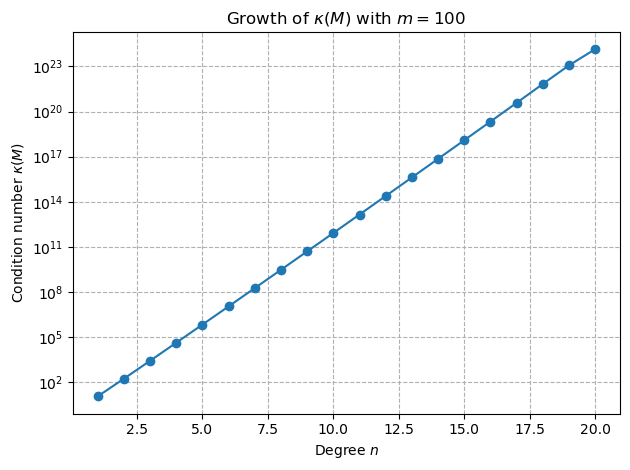

In [78]:
def compute_condition_numbers_centered(m: int, max_n: int):

    """
    Computes the condition numbers of the polynomial least-squares matrix M(m) for degrees n = 1 to max_n.

    Args:
        m (int): number of subintervals (m >= 0)
        max_n (int): maximum polynomial degree (max_n >= 0)
    Returns:
        list: condition numbers of M(m) for degrees n = 1 to max_n
    """

    conds = []
    for n in range(1, max_n + 1):
        M  = poly_ls_2(m, n)
        s  = np.linalg.svd(M, compute_uv=False) #computes singular values
        conds.append(s[0] / s[-1]) #κ = σ_max / σ_min
    return conds

m, max_n = 100, 20

cond_nums = compute_condition_numbers_centered(m, max_n)
n_values  = np.arange(1, max_n + 1)

print(f"Condition numbers at (m = {m})")
for n, κ in zip(n_values, cond_nums):
    print(f"  n = {n:2d} → κ(G) = {format_scientific(κ)}")

plt.figure()
plt.semilogy(n_values, cond_nums, marker="o")
plt.xlabel("Degree $n$")
plt.ylabel(r"Condition number $\kappa(M)$")
plt.title(fr"Growth of $\kappa(M)$ with $m = 100$")
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()


Least Squares With some Decompositions


In [79]:
from numpy.linalg import qr, svd, solve, pinv, cond #easier


def ls_qr(A, b):

    """
    Solves the least squares problem Ax = b using QR decomposition.

    Args:
        A : system matrix
        b : right-hand side vector
    Returns:
        x : solution vector
        y : fitted values (Ax)
    """

    Q, R = qr(A, mode='reduced')
    x = solve(R, Q.T @ b)
    y = A @ x
    
    return x, y

def ls_svd(A, b):

    """
    Solves the least squares problem Ax = b using SVD decomposition.

    Args:
        A : system matrix
        b : right-hand side vector
    Returns:
        x : solution vector
        y : fitted values (Ax)
    """

    U, S, Vt = svd(A, full_matrices=False)
    
    S_inv = np.zeros_like(S) #calculate the pseudo-inverse using SVD, x = V * S⁻¹ * U.T * b

    tol = np.finfo(float).eps * max(A.shape) * S[0] #tolarance for singular values
    
    for i in range(len(S)):
        if S[i] > tol:
            S_inv[i] = 1.0 / S[i] #inverts if above tolarance
    
    x = (Vt.T @ np.diag(S_inv) @ U.T) @ b
    y = A @ x
    
    return x, y

def ls_normal(A, b):

    """
    Solves the least squares problem Ax = b using normal equations.

    Args:
        A : system matrix
        b : right-hand side vector
    Returns:
        x : solution vector
        y : fitted values (Ax)
    """

    ATA = A.T @ A
    ATb = A.T @ b
    
    x = solve(ATA, ATb)
    y = A @ x
    
    return x, y

def build_A_matrix(m, n, centralized=False):

    """
    Creates the matrix A for polynomial regression of degree n.

    Args:
        m (int): number of subintervals (m >= 0)
        n (int): polynomial degree (n >= 0)
        centralized (bool): if True, use centralized points
    Returns:
        A (np.ndarray): shape (m+1, n+1) matrix for polynomial regression
        t (np.ndarray): array of points used to create the matrix
    """

    if centralized:
        t = np.array([i/m - 1/2 for i in range(m+1)])
    else:
        t = np.array([i/m for i in range(m+1)])
    
    A = np.zeros((m+1, n+1))
    
    for i in range(n+1):
        A[:, i] = t**i  #clever
        
    return A, t



Testing on some functions (2b)


Coefficients for sin(t):
QR:     α = 3.160 * 10^-2, β = 8.554 * 10^-1
SVD:    α = 3.160 * 10^-2, β = 8.554 * 10^-1
Normal: α = 3.160 * 10^-2, β = 8.554 * 10^-1

Residual errors for sin(t):
QR:     1.820 * 10^-1
SVD:    1.820 * 10^-1
Normal: 1.820 * 10^-1

Coefficients for e^t:
QR:     α = 8.741 * 10^-1, β = 1.691 * 10^0
SVD:    α = 8.741 * 10^-1, β = 1.691 * 10^0
Normal: α = 8.741 * 10^-1, β = 1.691 * 10^0

Residual errors for e^t:
QR:     6.436 * 10^-1
SVD:    6.436 * 10^-1
Normal: 6.436 * 10^-1

Coefficients for cos(3t):
QR:     α = 1.226 * 10^0, β = -2.360 * 10^0
SVD:    α = 1.226 * 10^0, β = -2.360 * 10^0
Normal: α = 1.226 * 10^0, β = -2.360 * 10^0

Residual errors for cos(3t):
QR:     7.989 * 10^-1
SVD:    7.989 * 10^-1
Normal: 7.989 * 10^-1


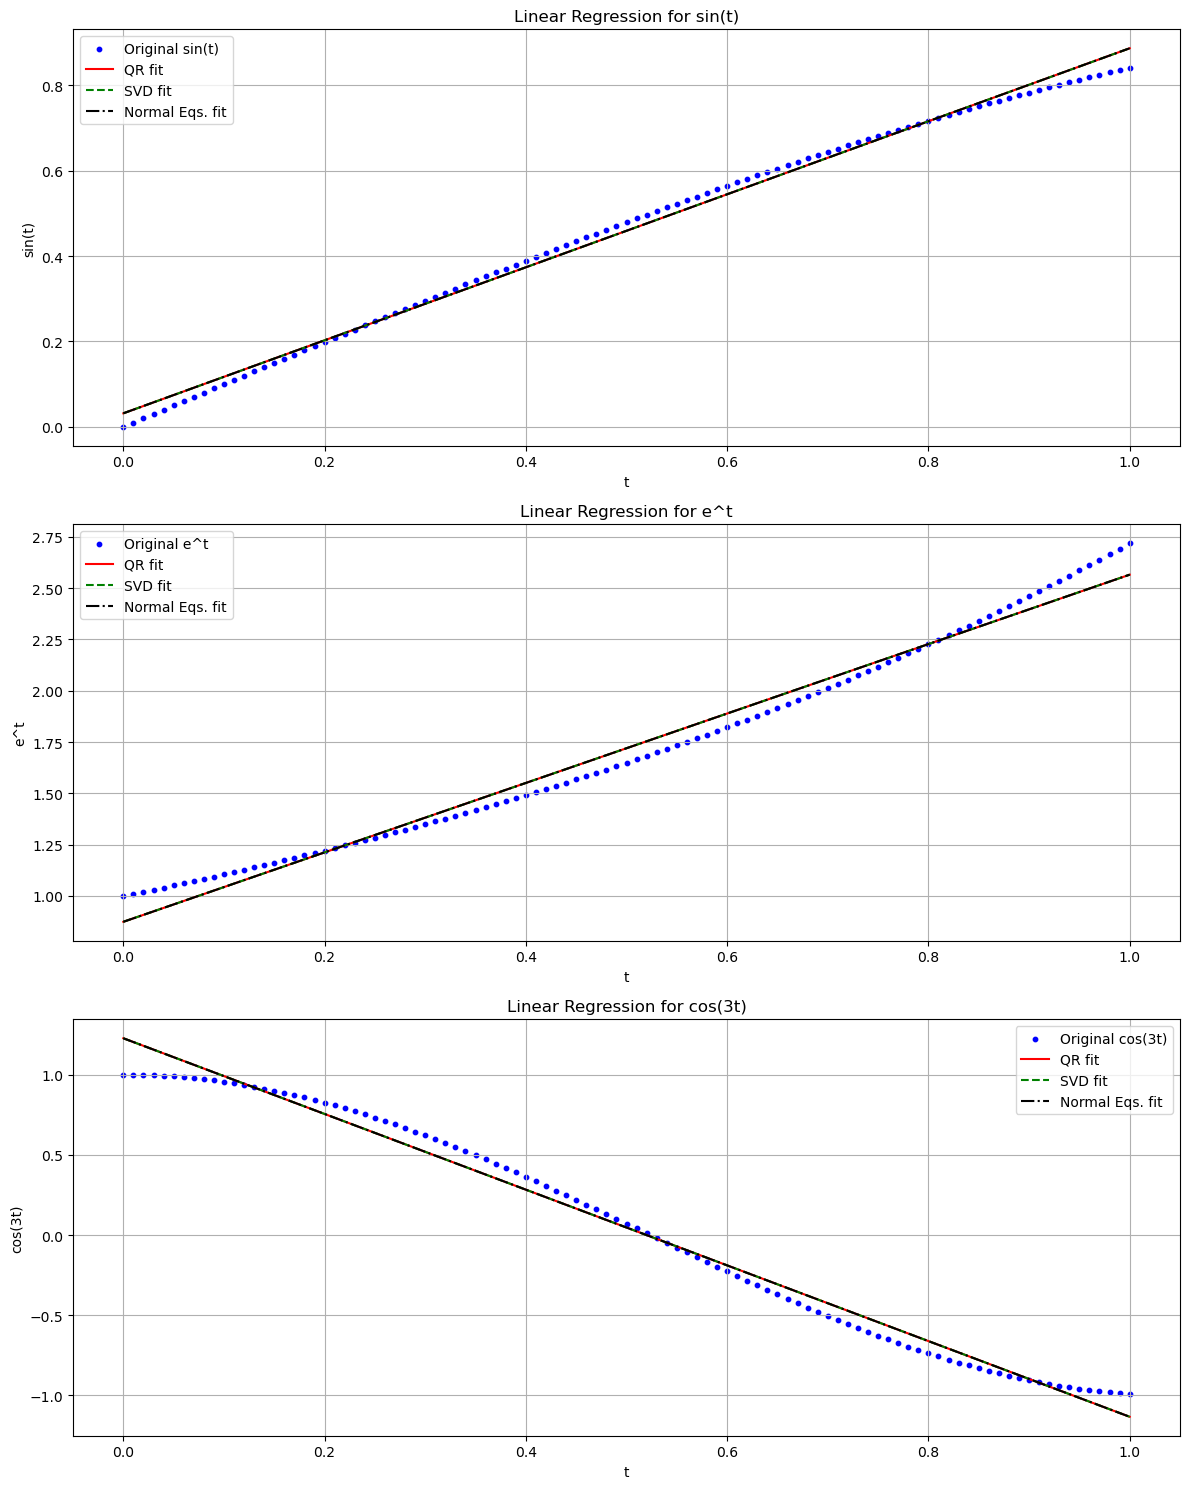

In [80]:
m = 100
t = np.linspace(0, 1, m+1)

f_values = np.sin(t)
g_values = np.exp(t)
h_values = np.cos(3*t)

A, _ = build_A_matrix(m, 1)  #linear

results = []
for name, values in [("sin(t)", f_values), ("e^t", g_values), ("cos(3t)", h_values)]:
    x_qr, y_qr = ls_qr(A, values)
    x_svd, y_svd = ls_svd(A, values)
    x_normal, y_normal = ls_normal(A, values)

    results.append({
        'name': name,
        'values': values,
        'x_qr': x_qr,
        'y_qr': y_qr,
        'x_svd': x_svd,
        'y_svd': y_svd,
        'x_normal': x_normal,
        'y_normal': y_normal
    }) #stores results here

    print(f"\nCoefficients for {name}:")
    print(f"QR:     α = {format_scientific(x_qr[0])}, β = {format_scientific(x_qr[1])}")
    print(f"SVD:    α = {format_scientific(x_svd[0])}, β = {format_scientific(x_svd[1])}")
    print(f"Normal: α = {format_scientific(x_normal[0])}, β = {format_scientific(x_normal[1])}")

    #show errors
    error_qr = np.linalg.norm(y_qr - values)
    error_svd = np.linalg.norm(y_svd - values)
    error_normal = np.linalg.norm(y_normal - values)

    print(f"\nResidual errors for {name}:")
    print(f"QR:     {format_scientific(error_qr)}")
    print(f"SVD:    {format_scientific(error_svd)}")
    print(f"Normal: {format_scientific(error_normal)}")

fig, axes = plt.subplots(3, 1, figsize=(12, 15))

for i, res in enumerate(results):
    ax = axes[i]
    ax.scatter(t, res['values'], color='blue', s=10, label=f'Original {res["name"]}')
    ax.plot(t, res['y_qr'], 'r-', label='QR fit')
    ax.plot(t, res['y_svd'], 'g--', label='SVD fit')
    ax.plot(t, res['y_normal'], 'k-.', label='Normal Eqs. fit')
    ax.set_title(f'Linear Regression for {res["name"]}')
    ax.set_xlabel('t')
    ax.set_ylabel(res['name'])
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


Testing With higher degree polynomials (2c)



----- Question 2c: Polynomial Regression with Degree up to 15 -----

Polynomial degree: 1
Condition number of A: 4.349 * 10^0
sin(t) - Errors: QR: 1.820 * 10^-1, SVD: 1.820 * 10^-1, Normal: 1.820 * 10^-1
e^t - Errors: QR: 6.436 * 10^-1, SVD: 6.436 * 10^-1, Normal: 6.436 * 10^-1
cos(3t) - Errors: QR: 7.989 * 10^-1, SVD: 7.989 * 10^-1, Normal: 7.989 * 10^-1

Polynomial degree: 2
Condition number of A: 2.247 * 10^1
sin(t) - Errors: QR: 2.822 * 10^-2, SVD: 2.822 * 10^-2, Normal: 2.822 * 10^-2
e^t - Errors: QR: 5.461 * 10^-2, SVD: 5.461 * 10^-2, Normal: 5.461 * 10^-2
cos(3t) - Errors: QR: 7.720 * 10^-1, SVD: 7.720 * 10^-1, Normal: 7.720 * 10^-1

Polynomial degree: 3
Condition number of A: 1.211 * 10^2
sin(t) - Errors: QR: 9.861 * 10^-4, SVD: 9.861 * 10^-4, Normal: 9.861 * 10^-4
e^t - Errors: QR: 3.460 * 10^-3, SVD: 3.460 * 10^-3, Normal: 3.460 * 10^-3
cos(3t) - Errors: QR: 2.564 * 10^-2, SVD: 2.564 * 10^-2, Normal: 2.564 * 10^-2

Polynomial degree: 4
Condition number of A: 6.654 * 10^2
sin

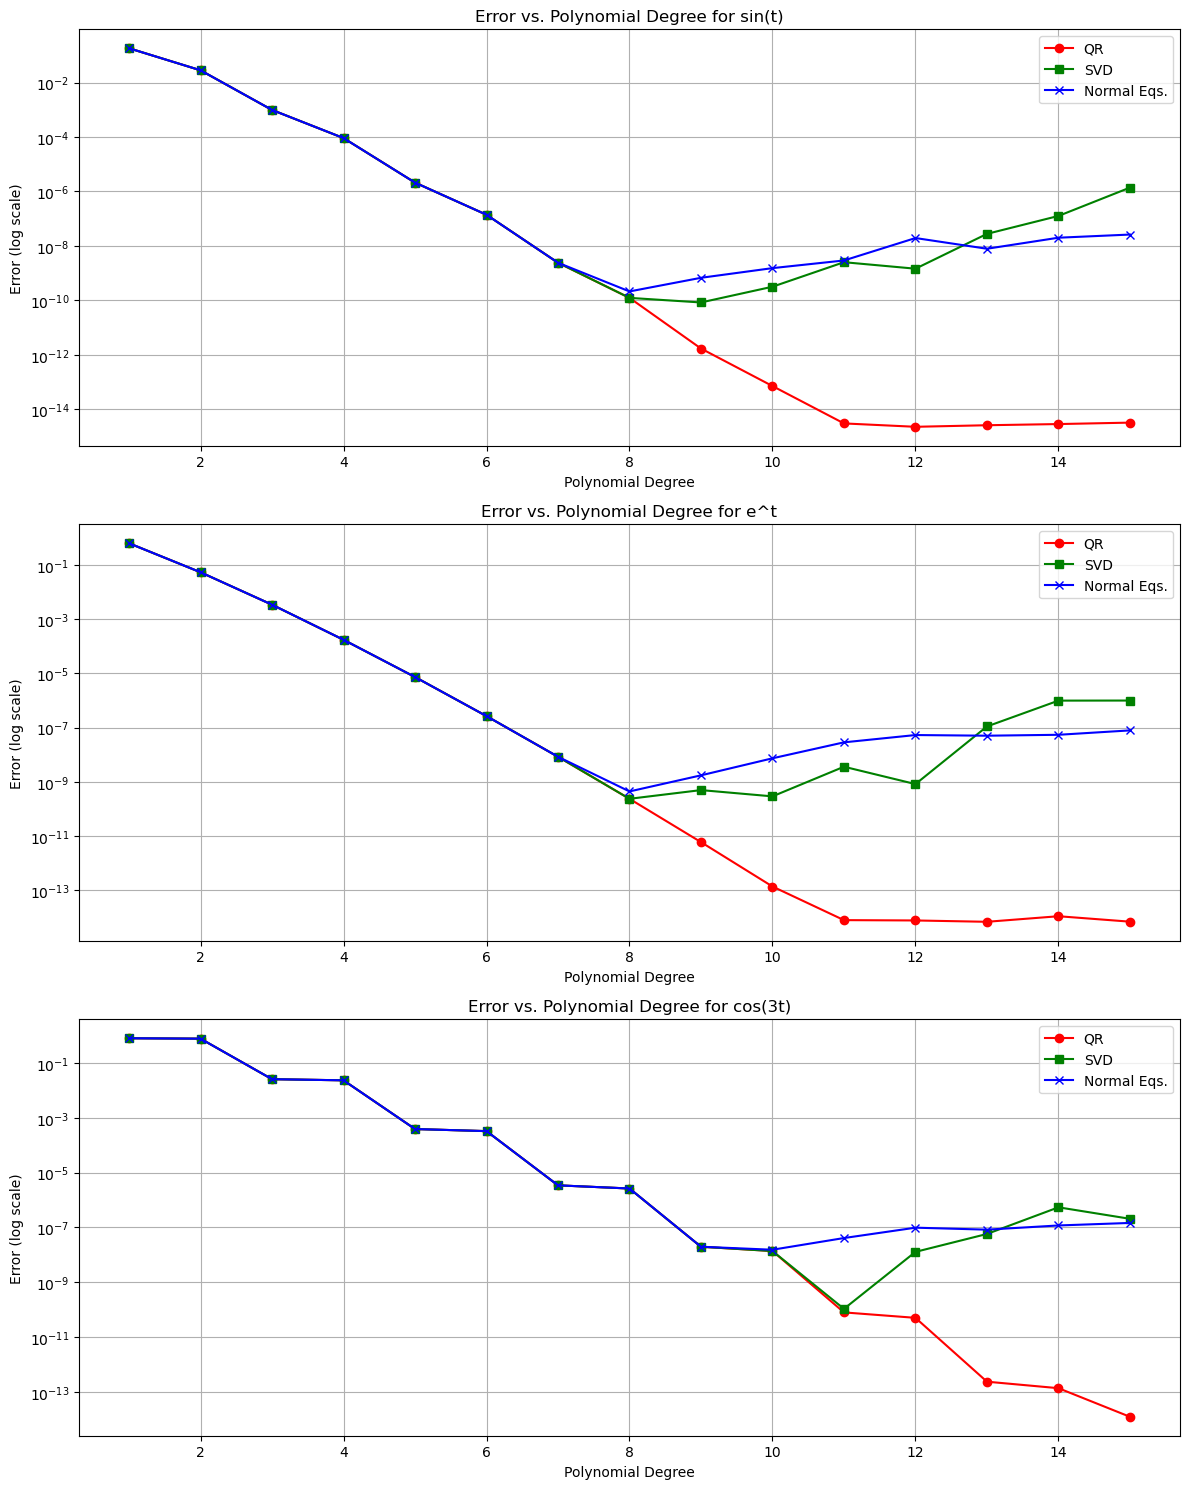

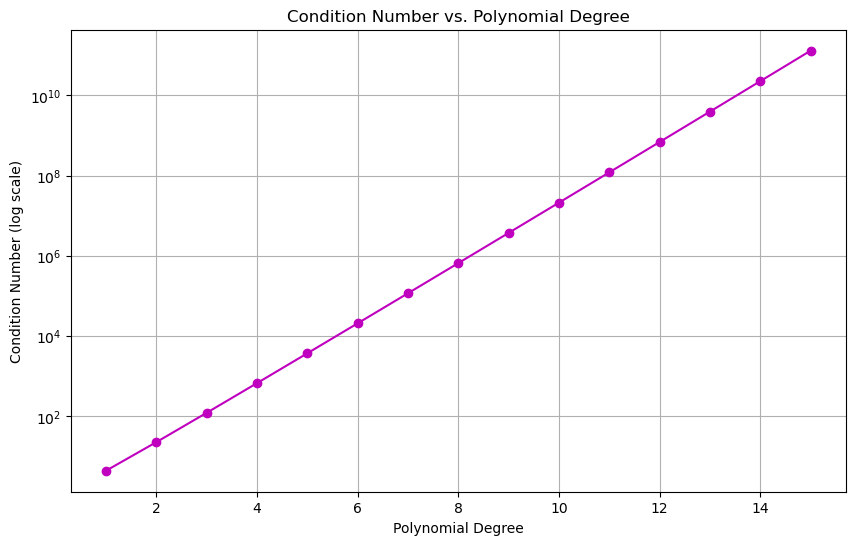

In [ ]:
m = 100
t = np.linspace(0, 1, m+1)

function_data = [(res['name'], res['values']) for res in results] #data here

max_degree = 20
all_errors = {name: {'qr': [], 'svd': [], 'normal': []} for name, _ in function_data}
all_cond_numbers = []

for n in range(1, max_degree + 1):
    print(f"\nPolynomial degree: {n}")
    
    A, _ = build_A_matrix(m, n) #matrix for regression
    cond_num = cond(A)
    all_cond_numbers.append(cond_num)
    print(f"Condition number of A: {format_scientific(cond_num)}")
    
    for name, values in function_data: #forall funcs, solve using all methods
        try:
            x_qr, y_qr = ls_qr(A, values)
            error_qr = np.linalg.norm(y_qr - values)
            all_errors[name]['qr'].append(error_qr)
        except Exception as e:
            print(f"Error with QR for {name}, degree {n}: {e}")
            all_errors[name]['qr'].append(np.nan)
            
        try:
            x_svd, y_svd = ls_svd(A, values)
            error_svd = np.linalg.norm(y_svd - values)
            all_errors[name]['svd'].append(error_svd)
        except Exception as e:
            print(f"Error with SVD for {name}, degree {n}: {e}")
            all_errors[name]['svd'].append(np.nan)
            
        try:
            x_normal, y_normal = ls_normal(A, values)
            error_normal = np.linalg.norm(y_normal - values)
            all_errors[name]['normal'].append(error_normal)
        except Exception as e:
            print(f"Error with Normal Equations for {name}, degree {n}: {e}")
            all_errors[name]['normal'].append(np.nan)
        
        #show errors
        print(f"{name} - Errors: QR: {format_scientific(all_errors[name]['qr'][-1])}, "
              f"SVD: {format_scientific(all_errors[name]['svd'][-1])}, "
              f"Normal: {format_scientific(all_errors[name]['normal'][-1])}")

#plot error x degree
fig, axes = plt.subplots(len(function_data), 1, figsize=(12, 5*len(function_data)))
degrees = list(range(1, max_degree + 1))

for i, (name, _) in enumerate(function_data):
    ax = axes[i] if len(function_data) > 1 else axes
    ax.semilogy(degrees, all_errors[name]['qr'], 'ro-', label='QR')
    ax.semilogy(degrees, all_errors[name]['svd'], 'gs-', label='SVD')
    ax.semilogy(degrees, all_errors[name]['normal'], 'bx-', label='Normal Eqs.')
    ax.set_title(f'Error vs. Polynomial Degree for {name}')
    ax.set_xlabel('Polynomial Degree')
    ax.set_ylabel('Error (log scale)')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

#plot condition x degree
plt.figure(figsize=(10, 6))
plt.semilogy(degrees, all_cond_numbers, 'mo-')
plt.xlabel('Polynomial Degree')
plt.ylabel('Condition Number (log scale)')
plt.title('Condition Number vs. Polynomial Degree')
plt.grid(True)
plt.show()


Testing with centralized vs standard points (extra)

Degree 1: Standard cond = 4.349 * 10^0, Centralized cond = 3.430 * 10^0
Degree 2: Standard cond = 2.247 * 10^1, Centralized cond = 1.325 * 10^1
Degree 3: Standard cond = 1.211 * 10^2, Centralized cond = 5.218 * 10^1
Degree 4: Standard cond = 6.654 * 10^2, Centralized cond = 2.077 * 10^2
Degree 5: Standard cond = 3.696 * 10^3, Centralized cond = 8.320 * 10^2
Degree 6: Standard cond = 2.067 * 10^4, Centralized cond = 3.352 * 10^3
Degree 7: Standard cond = 1.163 * 10^5, Centralized cond = 1.357 * 10^4
Degree 8: Standard cond = 6.567 * 10^5, Centralized cond = 5.513 * 10^4
Degree 9: Standard cond = 3.722 * 10^6, Centralized cond = 2.249 * 10^5
Degree 10: Standard cond = 2.116 * 10^7, Centralized cond = 9.210 * 10^5
Degree 11: Standard cond = 1.207 * 10^8, Centralized cond = 3.784 * 10^6
Degree 12: Standard cond = 6.900 * 10^8, Centralized cond = 1.559 * 10^7
Degree 13: Standard cond = 3.955 * 10^9, Centralized cond = 6.447 * 10^7
Degree 14: Standard cond = 2.273 * 10^10, Centralized cond =

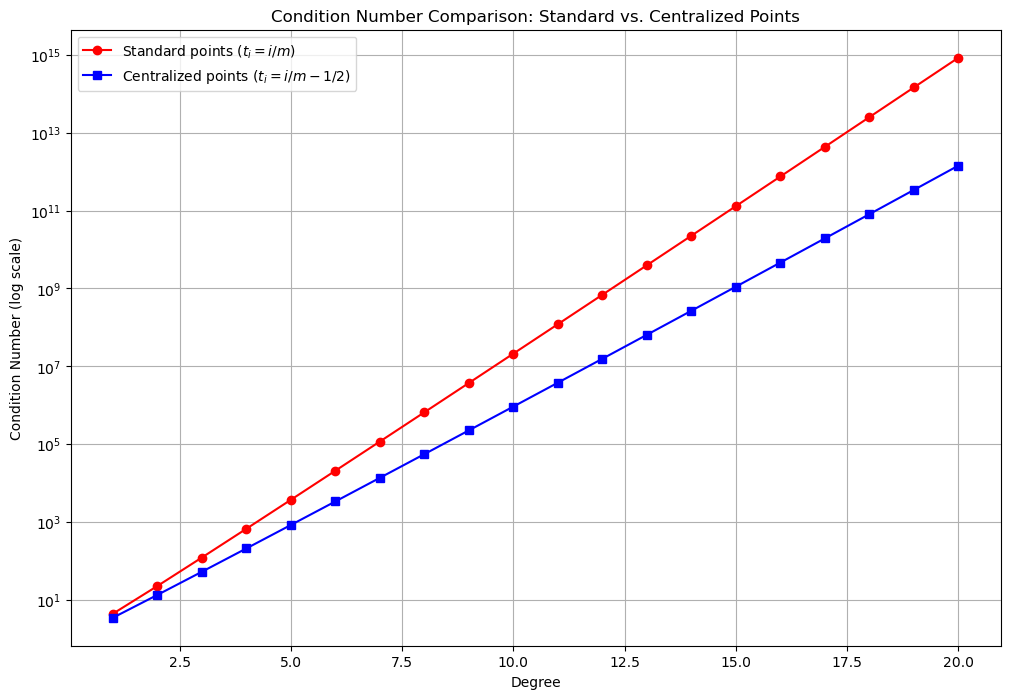

In [ ]:
m = 100  
max_degree = 20 

standard_condition_numbers = []
centralized_condition_numbers = []

for n in range(1, max_degree + 1):
    A_std, _ = build_A_matrix(m, n, centralized=False)
    cond_std = cond(A_std)
    standard_condition_numbers.append(cond_std)
 
    A_cent, _ = build_A_matrix(m, n, centralized=True)
    cond_cent = cond(A_cent)
    centralized_condition_numbers.append(cond_cent)

    print(f"Degree {n}: Standard cond = {format_scientific(cond_std)}, "
          f"Centralized cond = {format_scientific(cond_cent)}")

degrees = list(range(1, max_degree + 1))
plt.figure(figsize=(12, 8))
plt.semilogy(degrees, standard_condition_numbers, 'ro-', label='Standard points $(t_i = i/m)$')
plt.semilogy(degrees, centralized_condition_numbers, 'bs-', label='Centralized points $(t_i = i/m - 1/2)$')
plt.xlabel('Degree')
plt.ylabel('Condition Number (log scale)')
plt.title('Condition Number Comparison: Standard vs. Centralized Points')
plt.legend()
plt.grid(True)
plt.show()
